In [30]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
from pandas import tseries

In [2]:
data = pd.read_csv('EIA Data Sets/Data/net_generation.csv')
data.head()

,Date,"Electric power sector net generation from biomass, United States, Monthly (billion kilowatthours)","Electric power sector net generation from coal, United States, Monthly (billion kilowatthours)","Net energy for electricity load, United States, Monthly (billion kilowatthours)","Electric power sector net generation from geothermal, United States, Monthly (billion kilowatthours)","Electric power sector net generation from pumped storage hydropower, United States, Monthly (billion kilowatthours)","Electric power sector net generation from conventional hydropower, United States, Monthly (billion kilowatthours)","Electric power sector net generation from natural gas, United States, Monthly (billion kilowatthours)","Electric power sector net generation from nuclear, United States, Monthly (billion kilowatthours)","Electric power sector net generation from other nonrenewable fuels, United States, Monthly (billion kilowatthours)","Electric power sector net generation from other gases, United States, Monthly (billion kilowatthours)","Electric power sector net generation from petroleum, United States, Monthly (billion kilowatthours)","Electric power sector net generation from renewable energy (all types), United States, Monthly (billion kilowatthours)","Electric power sector net generation from utility-scale solar, United States, Monthly (billion kilowatthours)","Total electric power sector net generation by all energy sources, United States, Monthly (billion kilowatthours)","Electric power sector net generation from wind, United States, Monthly (billion kilowatthours)"
0,12/1/2020,1.862813,70.54828,326.5772,1.512993,-0.496784,23.82805,116.4394,72.54646,0.640074,0.428227,1.589645,64.88192,5.012265,326.5772,32.66580
1,11/1/2020,1.638054,55.38093,292.8734,1.431412,-0.336250,20.84670,111.2597,66.10233,0.605994,0.317438,1.562592,57.98058,5.924216,292.8734,28.14019
2,10/1/2020,2.264039,57.85693,306.3560,1.337518,-0.442759,19.63240,126.3004,61.42273,0.613575,0.156562,1.326140,59.12239,7.522503,306.3560,28.36593
3,9/1/2020,1.954046,63.53742,318.2363,1.379625,-0.620189,18.59246,136.5059,63.85781,0.327863,0.345714,1.804214,52.47764,8.976820,318.2363,21.57470
4,8/1/2020,2.114324,93.90338,388.0824,1.376648,-0.752724,21.51756,162.1831,70.26038,0.490478,0.413946,1.889336,59.69450,9.742568,388.0824,24.94340


In [3]:
data['Date'] = pd.to_datetime(data['Date'])
df = data.set_index('Date')
df

,"Electric power sector net generation from biomass, United States, Monthly (billion kilowatthours)","Electric power sector net generation from coal, United States, Monthly (billion kilowatthours)","Net energy for electricity load, United States, Monthly (billion kilowatthours)","Electric power sector net generation from geothermal, United States, Monthly (billion kilowatthours)","Electric power sector net generation from pumped storage hydropower, United States, Monthly (billion kilowatthours)","Electric power sector net generation from conventional hydropower, United States, Monthly (billion kilowatthours)","Electric power sector net generation from natural gas, United States, Monthly (billion kilowatthours)","Electric power sector net generation from nuclear, United States, Monthly (billion kilowatthours)","Electric power sector net generation from other nonrenewable fuels, United States, Monthly (billion kilowatthours)","Electric power sector net generation from other gases, United States, Monthly (billion kilowatthours)","Electric power sector net generation from petroleum, United States, Monthly (billion kilowatthours)","Electric power sector net generation from renewable energy (all types), United States, Monthly (billion kilowatthours)","Electric power sector net generation from utility-scale solar, United States, Monthly (billion kilowatthours)","Total electric power sector net generation by all energy sources, United States, Monthly (billion kilowatthours)","Electric power sector net generation from wind, United States, Monthly (billion kilowatthours)"
Date,,,,,,,,,,,,,,,
2020-12-01,1.862813,70.548280,326.5772,1.512993,-0.496784,23.828050,116.439400,72.546460,0.640074,0.428227,1.589645,64.88192,5.012265,326.5772,32.665800
2020-11-01,1.638054,55.380930,292.8734,1.431412,-0.336250,20.846700,111.259700,66.102330,0.605994,0.317438,1.562592,57.98058,5.924216,292.8734,28.140190
2020-10-01,2.264039,57.856930,306.3560,1.337518,-0.442759,19.632400,126.300400,61.422730,0.613575,0.156562,1.326140,59.12239,7.522503,306.3560,28.365930
2020-09-01,1.954046,63.537420,318.2363,1.379625,-0.620189,18.592460,136.505900,63.857810,0.327863,0.345714,1.804214,52.47764,8.976820,318.2363,21.574700
2020-08-01,2.114324,93.903380,388.0824,1.376648,-0.752724,21.517560,162.183100,70.260380,0.490478,0.413946,1.889336,59.69450,9.742568,388.0824,24.943400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-05-01,1.744683,150.043237,NaN,1.071382,-0.622526,18.875194,44.283321,61.512445,NaN,0.050532,9.933711,NaN,NaN,NaN,0.635029
2001-04-01,1.657999,139.033764,NaN,1.094990,-0.795915,17.722778,39.413096,56.003026,NaN,0.043303,10.415996,NaN,NaN,NaN,0.684694
2001-03-01,1.746260,153.452065,NaN,1.190022,-0.773345,20.132660,37.452990,62.140712,NaN,0.045323,11.206700,NaN,NaN,NaN,0.532120


In [4]:
price = pd.read_csv('EIA Data Sets/Data/prices.csv')
price['Date'] = pd.to_datetime(price['Date'])
price_df = price.set_index('Date')
price_df

,"Retail Price of Electricity for All Sectors, U.S. Total, Monthly (cents per kilowatt hour)"
Date,
1990-01-01,6.27000
1990-02-01,6.34000
1990-03-01,6.37000
1990-04-01,6.35000
1990-05-01,6.46000
...,...
2020-08-01,11.12406
2020-09-01,10.81302
2020-10-01,10.57964


In [5]:
price_gen = pd.merge(price_df,df, on='Date')
price_gen = price_gen.loc['2010-01-01':'2019-10-31']
price_gen.tail()

,"Retail Price of Electricity for All Sectors, U.S. Total, Monthly (cents per kilowatt hour)","Electric power sector net generation from biomass, United States, Monthly (billion kilowatthours)","Electric power sector net generation from coal, United States, Monthly (billion kilowatthours)","Net energy for electricity load, United States, Monthly (billion kilowatthours)","Electric power sector net generation from geothermal, United States, Monthly (billion kilowatthours)","Electric power sector net generation from pumped storage hydropower, United States, Monthly (billion kilowatthours)","Electric power sector net generation from conventional hydropower, United States, Monthly (billion kilowatthours)","Electric power sector net generation from natural gas, United States, Monthly (billion kilowatthours)","Electric power sector net generation from nuclear, United States, Monthly (billion kilowatthours)","Electric power sector net generation from other nonrenewable fuels, United States, Monthly (billion kilowatthours)","Electric power sector net generation from other gases, United States, Monthly (billion kilowatthours)","Electric power sector net generation from petroleum, United States, Monthly (billion kilowatthours)","Electric power sector net generation from renewable energy (all types), United States, Monthly (billion kilowatthours)","Electric power sector net generation from utility-scale solar, United States, Monthly (billion kilowatthours)","Total electric power sector net generation by all energy sources, United States, Monthly (billion kilowatthours)","Electric power sector net generation from wind, United States, Monthly (billion kilowatthours)"
Date,,,,,,,,,,,,,,,,
2019-06-01,10.80000,2.500330,78.024793,338.738883,1.370651,-0.385296,26.227339,128.333890,68.804879,0.599223,0.344190,1.405163,61.612041,8.139909,338.738883,23.373812
2019-07-01,11.06000,2.659966,100.402957,396.911009,1.426077,-0.622347,22.808609,164.789078,72.198595,0.618224,0.404281,1.595532,57.524689,8.182786,396.911009,22.447251
2019-08-01,10.98163,2.102103,105.580100,396.437600,1.373647,-0.799442,20.914850,164.225300,71.498100,0.490829,0.420494,1.901299,53.120960,7.578059,396.437600,21.152300
2019-09-01,10.69525,2.100022,88.324590,343.517200,1.304915,-0.646617,20.927660,135.224700,65.847270,0.325633,0.355415,1.880829,52.205360,7.066358,343.517200,20.806410
2019-10-01,10.46704,2.396545,68.329570,306.896700,1.389165,-0.473988,20.722700,120.144200,62.172640,0.608672,0.158158,1.458057,54.499380,5.989832,306.896700,24.001140


In [6]:
list(price_gen)

['Retail Price of Electricity for All Sectors, U.S. Total, Monthly (cents per kilowatt hour)',
 'Electric power sector net generation from biomass, United States, Monthly (billion kilowatthours)',
 'Electric power sector net generation from coal, United States, Monthly (billion kilowatthours)',
 'Net energy for electricity load, United States, Monthly (billion kilowatthours)',
 'Electric power sector net generation from geothermal, United States, Monthly (billion kilowatthours)',
 'Electric power sector net generation from pumped storage hydropower, United States, Monthly (billion kilowatthours)',
 'Electric power sector net generation from conventional hydropower, United States, Monthly (billion kilowatthours)',
 'Electric power sector net generation from natural gas, United States, Monthly (billion kilowatthours)',
 'Electric power sector net generation from nuclear, United States, Monthly (billion kilowatthours)',
 'Electric power sector net generation from other nonrenewable fuels,

In [7]:
price = price_gen['Retail Price of Electricity for All Sectors, U.S. Total, Monthly (cents per kilowatt hour)']
bio = price_gen['Electric power sector net generation from biomass, United States, Monthly (billion kilowatthours)']
geo = price_gen['Electric power sector net generation from geothermal, United States, Monthly (billion kilowatthours)']
hydro = price_gen['Electric power sector net generation from pumped storage hydropower, United States, Monthly (billion kilowatthours)']
conv_hydro = price_gen['Electric power sector net generation from conventional hydropower, United States, Monthly (billion kilowatthours)']
nat_gas = price_gen['Electric power sector net generation from natural gas, United States, Monthly (billion kilowatthours)']
nuc = price_gen['Electric power sector net generation from nuclear, United States, Monthly (billion kilowatthours)']
nonrenew = price_gen['Electric power sector net generation from other nonrenewable fuels, United States, Monthly (billion kilowatthours)']
coal = price_gen['Electric power sector net generation from coal, United States, Monthly (billion kilowatthours)']
petro = price_gen['Electric power sector net generation from petroleum, United States, Monthly (billion kilowatthours)']
renew_sum = price_gen['Electric power sector net generation from renewable energy (all types), United States, Monthly (billion kilowatthours)']
total = price_gen['Total electric power sector net generation by all energy sources, United States, Monthly (billion kilowatthours)']
solar = price_gen['Electric power sector net generation from utility-scale solar, United States, Monthly (billion kilowatthours)']
wind = price_gen['Electric power sector net generation from wind, United States, Monthly (billion kilowatthours)']

# All elements as perecent of total
bio_pct = bio/total
geo_pct = geo/total
hydro_pct = hydro/total
conv_hydro_pct = conv_hydro/total
nat_gas_pct = nat_gas/total
nuc_pct = nuc/total
nonrenew_pct = nonrenew/total
coal_pct = coal/total
petro_pct = petro/total
solar_pct = solar/total
wind_pct = wind/total
renew_pct = renew_sum/total

# All elements as percent of renewable total
bio_pct_green = bio/renew_sum
geo_pct_green = geo/renew_sum
hydro_pct_green = hydro/renew_sum
conv_hydro_pct_green = conv_hydro/renew_sum
nat_gas_pct_green = nat_gas/renew_sum
nuc_pct_green = nuc/renew_sum
nonrenew_pct_green = nonrenew/renew_sum
coal_pct_green = coal/renew_sum
petro_pct_green = petro/renew_sum
solar_pct_green = solar/renew_sum
wind_pct_green = wind/renew_sum

C:\Users\rhaws\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


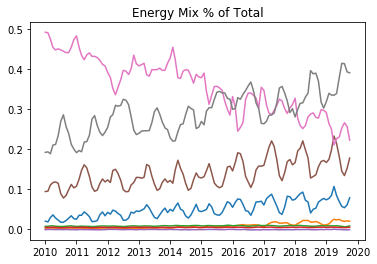

In [8]:
plt.plot(wind_pct)
plt.plot(solar_pct)
plt.plot(bio_pct)
plt.plot(geo_pct)
plt.plot(hydro_pct)
plt.plot(renew_pct)
plt.plot(coal_pct)
plt.plot(nat_gas_pct)
# plt.plot(total)
# plt.plot(t_mean)
# plt.legend()
plt.title('Energy Mix % of Total')
plt.show()

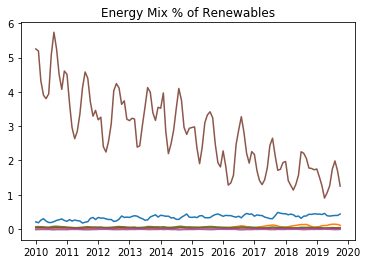

In [9]:
plt.plot(wind_pct_green)
plt.plot(solar_pct_green)
plt.plot(bio_pct_green)
plt.plot(geo_pct_green)
plt.plot(hydro_pct_green)
# plt.plot(renew_sum_pct)
plt.plot(coal_pct_green)
# plt.plot(total)
# plt.plot(t_mean)
# plt.legend()
plt.title('Energy Mix % of Renewables')
plt.show()

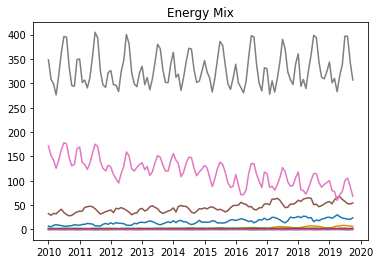

In [10]:
plt.plot(wind)
plt.plot(solar)
plt.plot(bio)
plt.plot(geo)
plt.plot(hydro)
plt.plot(renew_sum)
plt.plot(coal)
plt.plot(total)
# plt.plot(t_mean)
# plt.legend()
plt.title('Energy Mix')
plt.show()

Text(0.5, 1.0, 'Price vs Renewables Generation')

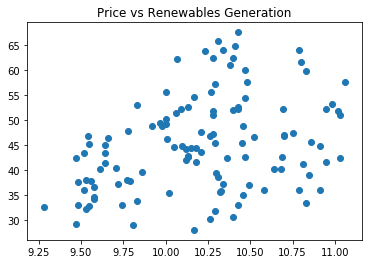

In [11]:
plt.scatter(price, renew_sum)
plt.title("Price vs Renewables Generation")

Text(0.5, 1.0, 'Price vs Natual Gas')

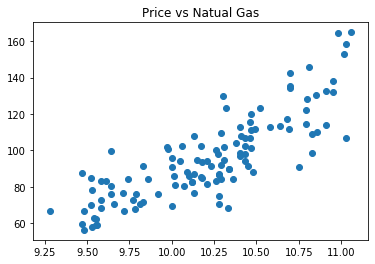

In [12]:
plt.scatter(price, nat_gas)
plt.title("Price vs Natual Gas")

Text(0.5, 1.0, 'Price vs Coal')

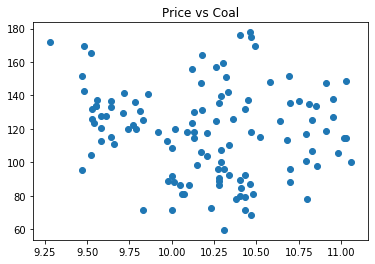

In [13]:
plt.scatter(price, coal)
plt.title("Price vs Coal")

In [14]:
X = price
y = renew_sum
X1 = sm.add_constant(X)

C:\Users\rhaws\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [25]:
#make regression model
model = sm.OLS(y,X1)

In [26]:
# fit model and print results
results = model.fit()
print(results.summary())

                                                                              OLS Regression Results                                                                              
Dep. Variable:     Electric power sector net generation from renewable energy (all types), United States, Monthly (billion kilowatthours)   R-squared:                       0.115
Model:                                                                                                                                OLS   Adj. R-squared:                  0.108
Method:                                                                                                                     Least Squares   F-statistic:                     15.10
Date:                                                                                                                    Sat, 16 Nov 2019   Prob (F-statistic):           0.000170
Time:                                                                                                    

In [27]:
# alternatively scipy linear regression
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

print(std_err)

1.8453903775681975


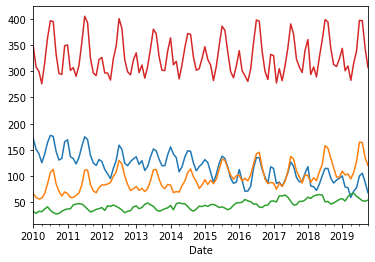

In [28]:
coal.plot()
nat_gas.plot()
renew_sum.plot()
total.plot()
# plt.legend()


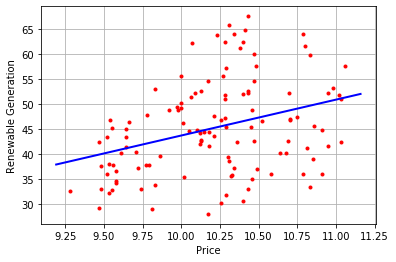

In [49]:
plt.plot(price, renew_sum, 'r.')
# plt.plot(price, nat_gas, 'black')
ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)

plt.plot(x, results.params[0] + results.params[1] * x, 'b', lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Price')
plt.ylabel('Renewable Generation')

plt.show()

In [36]:
print(results)

## Loop Attempt

In [50]:
var = [nat_gas, coal, total, solar, wind, renew_sum]

In [54]:
X = price
# y = renew_sum
X1 = sm.add_constant(X)

In [65]:
# for i in var:
#make regression model
model = sm.OLS(total,X1)

In [66]:
# fit model and print results
results = model.fit()
print(results.summary())

                                                                           OLS Regression Results                                                                           
Dep. Variable:     Total electric power sector net generation by all energy sources, United States, Monthly (billion kilowatthours)   R-squared:                       0.356
Model:                                                                                                                          OLS   Adj. R-squared:                  0.351
Method:                                                                                                               Least Squares   F-statistic:                     64.22
Date:                                                                                                              Sat, 16 Nov 2019   Prob (F-statistic):           9.72e-13
Time:                                                                                                                      20:44:18   L

No handles with labels found to put in legend.


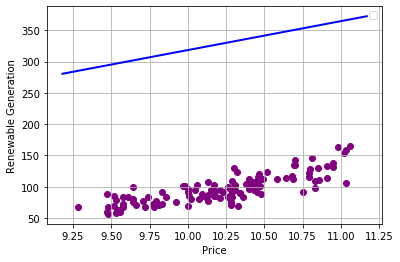

No handles with labels found to put in legend.


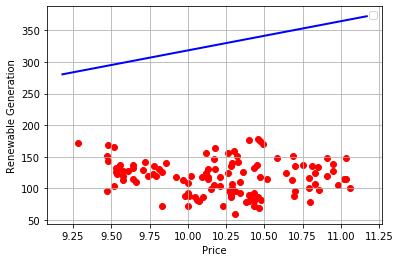

No handles with labels found to put in legend.


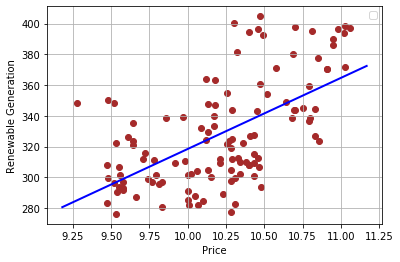

No handles with labels found to put in legend.


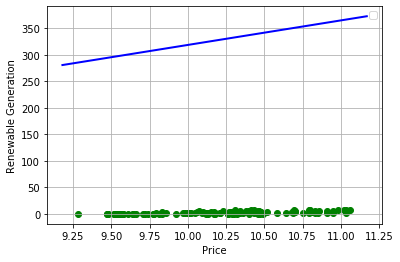

No handles with labels found to put in legend.


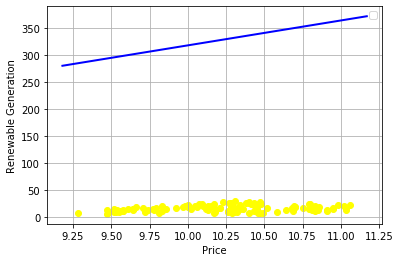

No handles with labels found to put in legend.


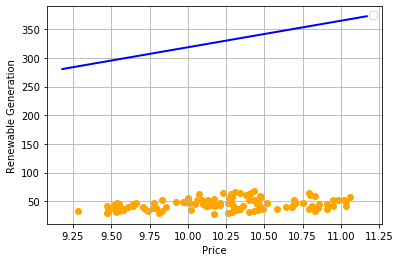

In [67]:
colors = ['purple', 'red', 'brown','green','yellow','orange']
c=0

for i in var:

    plt.scatter(price, i, color=colors[c])
    # plt.plot(price, nat_gas, 'black')
    ax = plt.axis()
    x = np.linspace(ax[0], ax[1] + 0.01)

    plt.plot(x, results.params[0] + results.params[1] * x, 'b', lw=2)

    plt.grid(True)
    plt.axis('tight')
    plt.xlabel('Price')
    plt.ylabel('Renewable Generation')
    c=c+1
    plt.legend()    
    plt.show()